# Multivariate Time Series Analysis - Simulating Cointegration

By looking at financial instruments individually, they might seem uncorrelated and unpredicted in the meean, and therefore prove the EMH. However, correlation among them is still present and might be exploited by trading activity.

## Cointegration

It implies the existence of some underlying forces in the economy that are keeping together the *n* time series in the long run, even if they all seem to be individually random walks.

<p style = "text-align:center"> $x_t = x_{t-1} + u_t$, $u_t \sim N(0,1)$ </p>

<p style = "text-align:center"> $y_t = \gamma x_t + v_t$, $v_t \sim N(0,1)$ </p>


### Generate the two time series of length 100 and plot them

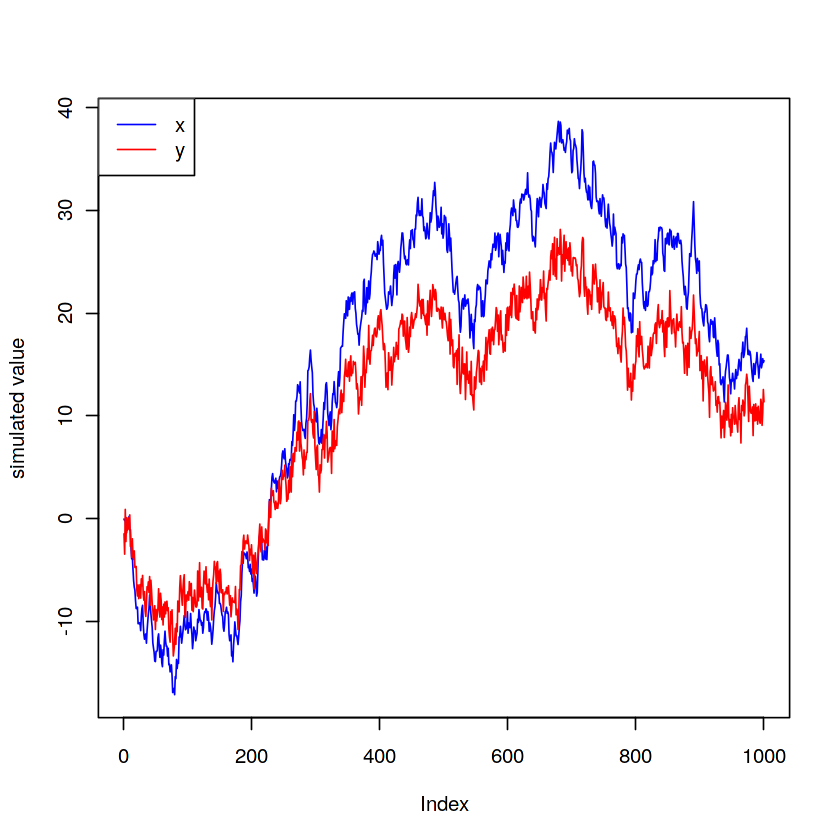

In [2]:
set.seed(20140623)
N <- 1000

# Simulate a normal random walk
# cumsum returns a vector whose elements are the sum of the previous vectors
# This because Xt is a function of itself in the past so you get the value at time (t) 
# as a cumulative sum of the random components (which is x_t-1)

x <- cumsum(rnorm(N))

gamma <- 0.7

    y <- gamma * x + rnorm(N)

# plot the two time series

plot(x, type = "l", col = "blue", ylab = "simulated value")
lines(y, col = "red")
legend("topleft", legend=c("x", "y"),
       col=c("blue", "red"), lty=1)

By visual inspection both series seem to be individually random walks. We can test for Stationarity using the Augemnted Dickey Fuller test.

<p style = "text-align:center"> $H_0: \text{Unit Root  } \exists$  </p>

<p style = "text-align:center"> $H_1: \text{Unit Root  } \nexists$  </p>

Reject $H_0$ if $\text{T-stat} < \text{Critical Value}$

In [3]:
# Statistical Tests

library(urca)

# ADF test for the simulated individual time series

## Series 1

summary(ur.df(x, type = "none"))

## Series 2

summary(ur.df(y, type = "none"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1444 -0.6358 -0.0201  0.7097  3.8195 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
z.lag.1    -0.0008732  0.0014633  -0.597    0.551
z.diff.lag  0.0419997  0.0316662   1.326    0.185

Residual standard error: 1.005 on 996 degrees of freedom
Multiple R-squared:  0.002076,	Adjusted R-squared:  7.212e-05 
F-statistic: 1.036 on 2 and 996 DF,  p-value: 0.3553


Value of test-statistic is: -0.5967 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5647 -0.9378  0.0417  1.0174  3.5752 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.002696   0.002934  -0.919    0.358    
z.diff.lag -0.389791   0.029172 -13.362   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.407 on 996 degrees of freedom
Multiple R-squared:  0.1539,	Adjusted R-squared:  0.1522 
F-statistic: 90.61 on 2 and 996 DF,  p-value: < 2.2e-16


Value of test-statistic is: -0.9188 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


The T-statistics is greater than the critical values in all cases, therefore we conclude that there is unit root in the two processes and therefore they are individually unit root processes (i.e. non-stationary).

## Taking the Linear Combination of the Two Series

<p style = "text-align:center">  $y_t = \gamma x_t + v_t$ </p>

<p style = "text-align:center"> $\Leftrightarrow$ $z_t = y_t - \gamma x_t$ </p>

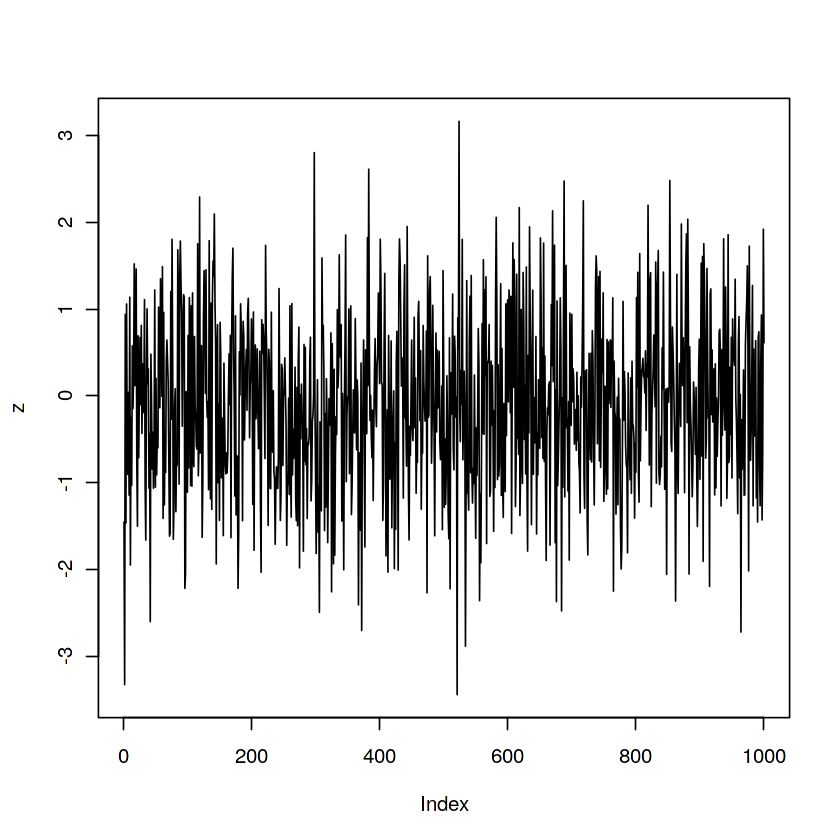

In [4]:
z = y - gamma*x
plot(z, type = "l")

$z_t$ clearly seems to be a white noise process, the rejection of the unit root in this case is confirmed by an ADF test:

In [5]:
summary(ur.df(z, type = "none"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4403 -0.7938 -0.0945  0.5917  3.1327 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.95411    0.04390 -21.735   <2e-16 ***
z.diff.lag -0.01968    0.03154  -0.624    0.533    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9939 on 996 degrees of freedom
Multiple R-squared:  0.4895,	Adjusted R-squared:  0.4885 
F-statistic: 477.5 on 2 and 996 DF,  p-value: < 2.2e-16


Value of test-statistic is: -21.7351 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


## Engle-Granger Cointegration Test on Residuals

In the Real World, we do not know the value of the parameter $\gamma$ which has to be estimated based on the raw data by running a linear regression on the other, i.e. an **Engle-Granger** cointegration methodology.

1. Run a Linear Regression $y_t$ on $x_t$ (a simple OLS estimation)

2. Test the Residuals for the presence of a unit root

In [6]:
# Estimate the cointegrating relationship

coin <- lm(y ~ x - 1) # Regression without intercept
summary(ur.df(coin$resid))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3734 -0.7470 -0.0541  0.6225  3.1987 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.96175    0.04399 -21.861   <2e-16 ***
z.diff.lag -0.01585    0.03154  -0.503    0.615    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9919 on 996 degrees of freedom
Multiple R-squared:  0.4914,	Adjusted R-squared:  0.4904 
F-statistic: 481.2 on 2 and 996 DF,  p-value: < 2.2e-16


Value of test-statistic is: -21.8607 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


As we can see, the presence of a unit root in the residuals is rejected, meaning that our residuals follow a white noise process.